# CodSoft / Task 2

`Goal :` Predict the rating of movies using the other available variables.

## Importing libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

## Data loading

In [37]:
movies = pd.read_csv("IMDb Movies India.csv", encoding="latin-1")
movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


## Data cleaning

In [39]:
print(type(movies["Year"].iloc[1]))
print(type(movies["Duration"].iloc[1]))
print(type(movies["Votes"].iloc[1]))

<class 'str'>
<class 'str'>
<class 'str'>


In [40]:
for col in movies.columns:
    print("The column :", col)
    print(len(movies[col].unique()), "unique value")
    print(movies[col].unique())
    print("\n\n", "/"*70)

The column : Name
13838 unique value
[' ' '#Gadhvi (He thought he was Gandhi)' '#Homecoming' ... 'Zulmi Raj'
 'Zulmi Shikari' 'Zulm-O-Sitam']


 //////////////////////////////////////////////////////////////////////
The column : Year
103 unique value
[nan '(2019)' '(2021)' '(2010)' '(1997)' '(2005)' '(2008)' '(2012)'
 '(2014)' '(2004)' '(2016)' '(1991)' '(1990)' '(2018)' '(1987)' '(1948)'
 '(1958)' '(2017)' '(2020)' '(2009)' '(2002)' '(1993)' '(1946)' '(1994)'
 '(2007)' '(2013)' '(2003)' '(1998)' '(1979)' '(1951)' '(1956)' '(1974)'
 '(2015)' '(2006)' '(1981)' '(1985)' '(2011)' '(2001)' '(1967)' '(1988)'
 '(1995)' '(1959)' '(1996)' '(1970)' '(1976)' '(2000)' '(1999)' '(1973)'
 '(1968)' '(1943)' '(1953)' '(1986)' '(1983)' '(1989)' '(1982)' '(1977)'
 '(1957)' '(1950)' '(1992)' '(1969)' '(1975)' '(1947)' '(1972)' '(1971)'
 '(1935)' '(1978)' '(1960)' '(1944)' '(1963)' '(1940)' '(1984)' '(1934)'
 '(1955)' '(1936)' '(1980)' '(1966)' '(1949)' '(1962)' '(1964)' '(1952)'
 '(1933)' '(1942)' '(193

- `Year`, `Duration`, `Votes` are numeric variables but they are encoded as strings.

In [41]:
movies["Year"] = movies["Year"].astype(str).str.extract("(\d+)", expand=False).astype("Int64")
movies["Duration"] = movies["Duration"].astype(str).str.extract("(\d+)", expand=False).astype("Int64")
movies.rename(columns={"Duration" : "Duration(min)"}, inplace=True)
movies["Votes"] = movies["Votes"].str.replace(",", "")
movies["Votes"] = pd.to_numeric(movies["Votes"], errors="coerce")
movies

,Name,Year,Duration(min),Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,<NA>,<NA>,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,<NA>,Action,4.6,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129,"Action, Drama",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,2005,<NA>,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,1988,<NA>,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
pd.DataFrame({"Number of missing values": movies.isna().sum(), "Percent of missing values(%)": movies.isna().sum()*100/len(movies)})\
.sort_values("Number of missing values", ascending=False)

,Number of missing values,Percent of missing values(%)
Duration(min),8269,53.317429
Rating,7590,48.939326
Votes,7590,48.939326
Actor 3,3144,20.272100
Actor 2,2384,15.371720
Genre,1877,12.102650
Actor 1,1617,10.426204
Year,528,3.404475
Director,525,3.385131
Name,0,0.000000


- `Rating` variable is the one that we want to predict. So we should drop all missing values in it.

In [43]:
movies.dropna(subset=["Rating"], inplace=True)
movies.reset_index(drop=True, inplace=True)
pd.DataFrame({"Number of missing values": movies.isna().sum(), "Percent of missing values(%)": movies.isna().sum()*100/len(movies)})\
.sort_values("Number of missing values", ascending=False)

,Number of missing values,Percent of missing values(%)
Duration(min),2068,26.114408
Actor 3,292,3.687334
Actor 2,200,2.525571
Actor 1,125,1.578482
Genre,102,1.288041
Director,5,0.063139
Name,0,0.000000
Year,0,0.000000
Rating,0,0.000000
Votes,0,0.000000


In [44]:
movies[movies.duplicated]

,Name,Year,Duration(min),Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3


In [45]:
movies[movies.duplicated(subset=["Name", "Year"], keep=False)]

,Name,Year,Duration(min),Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
3187,India's Daughter,2015,63,"Documentary, Biography, Crime",8.2,1998.0,Leslee Udwin,Asha Devi,Badri Singh,Satendra
3188,India's Daughter,2015,120,"Action, Crime, Drama",6.9,21.0,Rupesh Paul,Omkar Das Manikpuri,Amann Grewal,Vishal Om Prakash
6359,Sant Dnyaneshwar,1940,139,Fantasy,7.9,45.0,Vishnupant Govind Damle,Sheikh Fattelal,Shahu Modak,Datta Dharmadhikari
6360,Sant Dnyaneshwar,1940,137,Biography,8.1,9.0,Vishnupant Govind Damle,Sheikh Fattelal,Shahu Modak,Datta Dharmadhikari
7575,Vikram,1986,136,"Action, Adventure, Sci-Fi",7.3,504.0,Rajasekar,Kamal Haasan,Sathyaraj,Ambika
7576,Vikram,1986,<NA>,"Action, Drama, Romance",7.1,38.0,V. Madhusudan Rao,Nagarjuna Akkineni,Shobana,Annapoorna


In [46]:
movies.drop(6360, inplace=True)
movies.reset_index(drop=True, inplace=True)

- It seem that the above movies are distincts due to the difference in actors and duration, but `Sant Dnyaneshwar` are clearly the exact same movie for many evidences : The same year, 2 min difference in duration, The same actors.

In [47]:
movies.isna().sum()

Name                0
Year                0
Duration(min)    2068
Genre             102
Rating              0
Votes               0
Director            5
Actor 1           125
Actor 2           200
Actor 3           292
dtype: int64

In [48]:
movies["Year"].fillna(np.round(movies["Year"].mean(), 2), inplace=True)
movies["Duration(min)"].fillna(np.round(movies["Duration(min)"].mean()), inplace=True)
movies["Rating"].fillna(np.round(movies["Rating"].mean(), 2) , inplace=True)
movies["Votes"].fillna(np.round(movies["Votes"].mean()), inplace=True)
movies.isna().sum()

Name               0
Year               0
Duration(min)      0
Genre            102
Rating             0
Votes              0
Director           5
Actor 1          125
Actor 2          200
Actor 3          292
dtype: int64

In [49]:
len(movies)

7918

In [50]:
movies.dropna(subset=["Genre"], inplace=True)
movies.reset_index(drop=True, inplace=True)
print(len(movies))
movies.isna().sum()

7816


Name               0
Year               0
Duration(min)      0
Genre              0
Rating             0
Votes              0
Director           5
Actor 1          110
Actor 2          176
Actor 3          259
dtype: int64

## Viualisation and Inference

I will investigate the trends and patterns that the data have. Answering questions like :
- Does the rating tend to increase while the duration of the movies increases ?
- Is there any relation between the rating and number of votes ?
- Which directors have the top rating of movies ?
- Which actors have the top ratings of movies ?
- The trend of number of movies across years?
- The trend of number of votes across years?
- The trend of ratings across years?

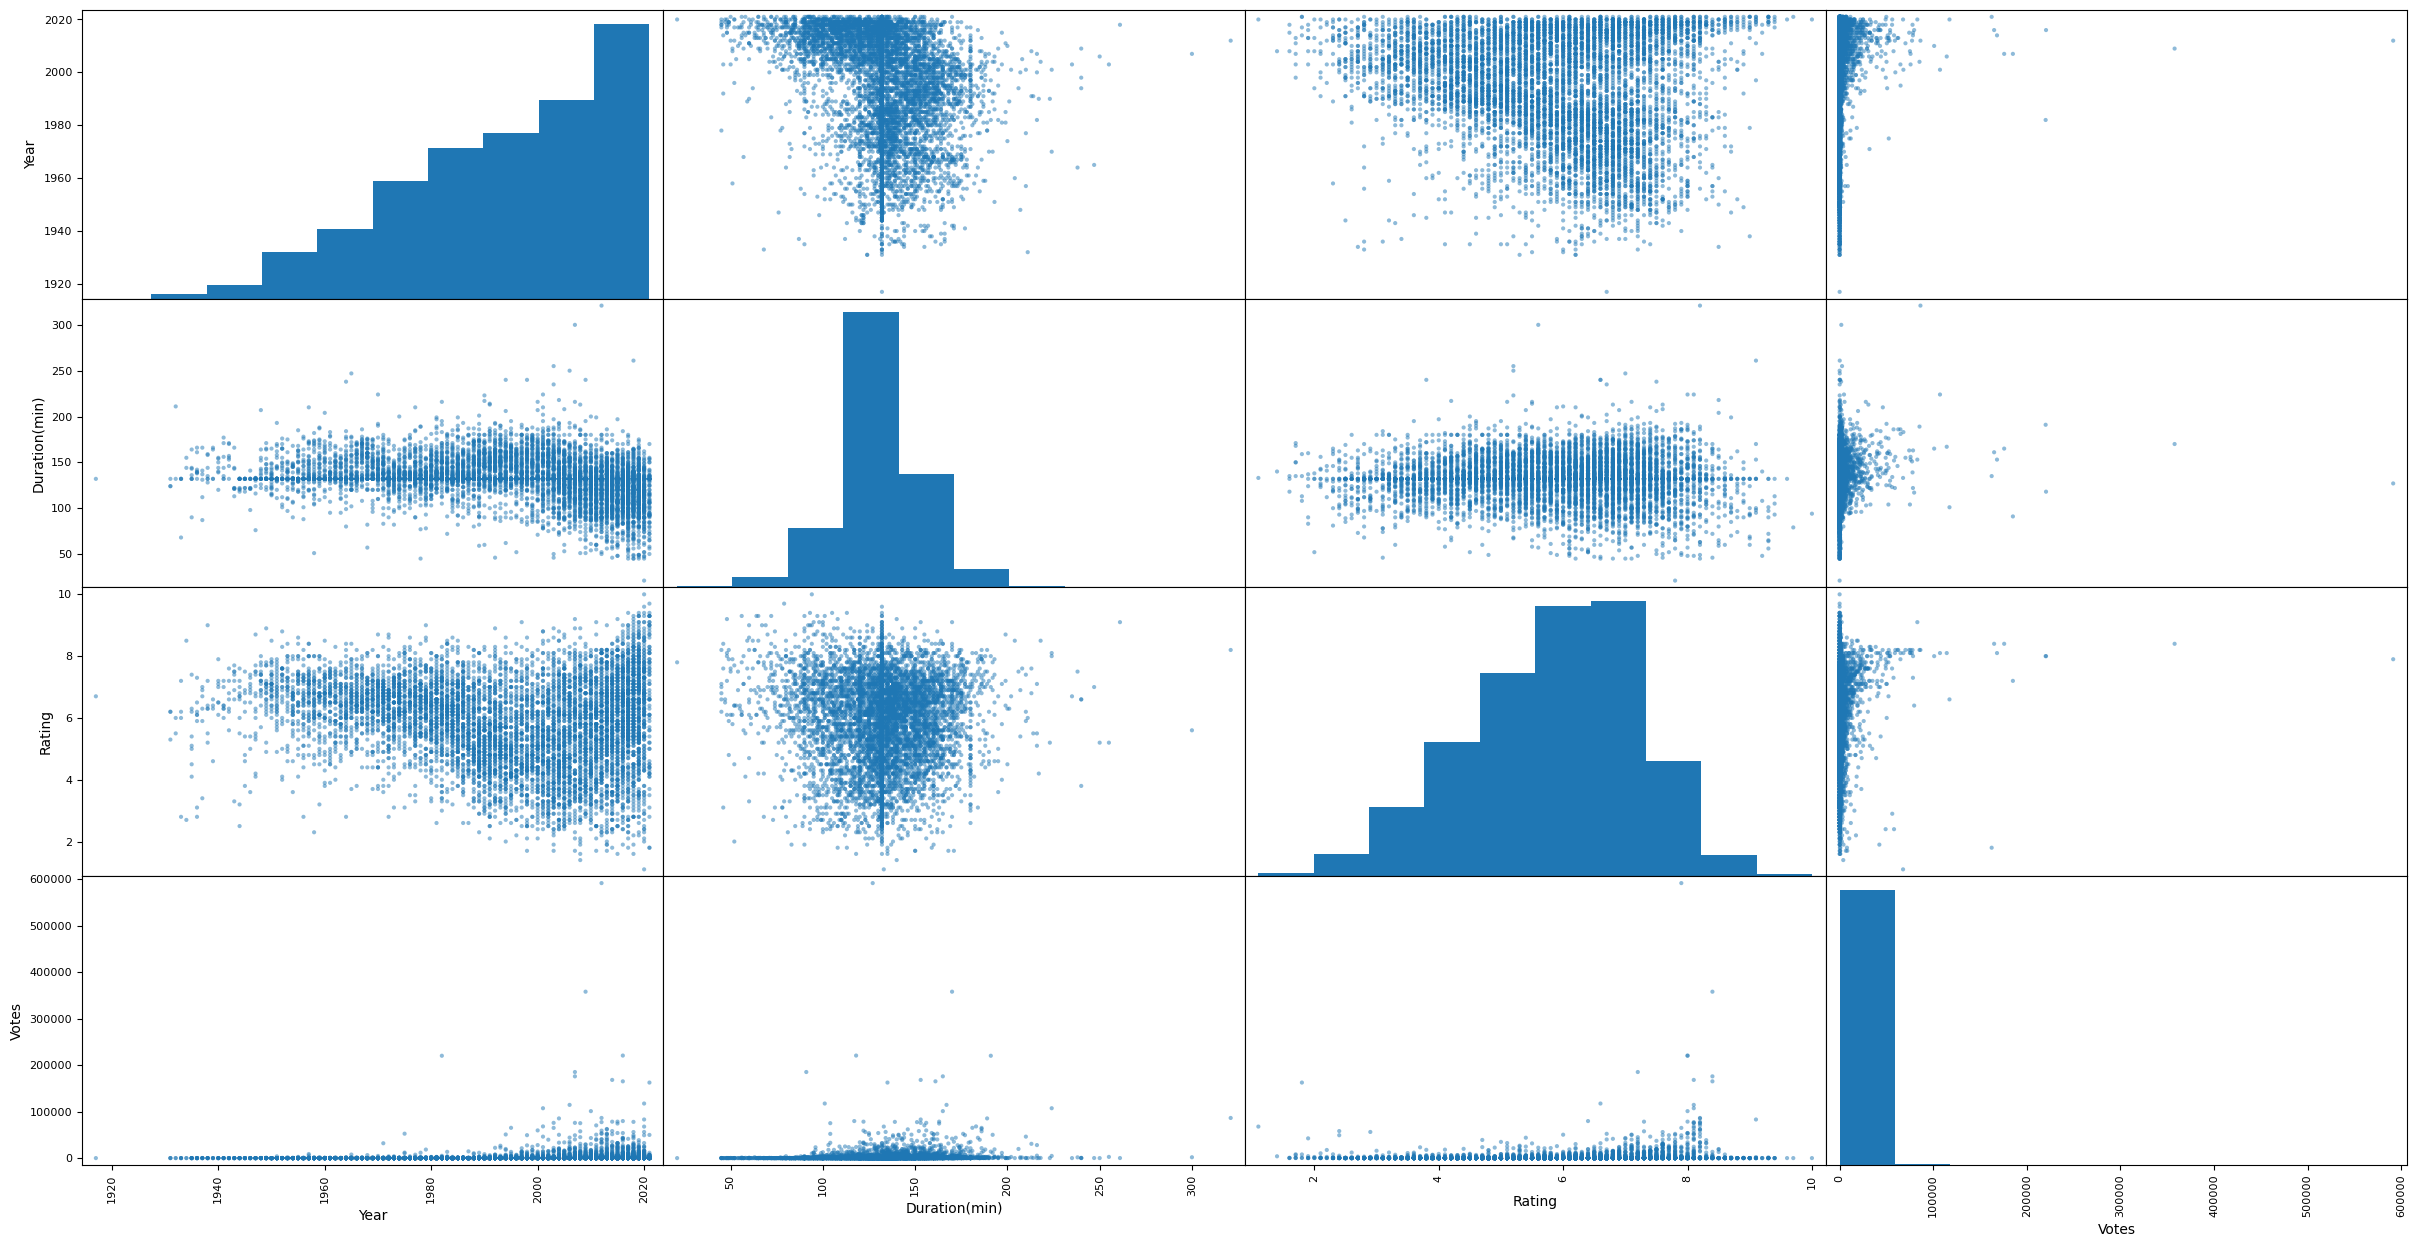

In [51]:
pd.plotting.scatter_matrix(movies, figsize=(30, 15));

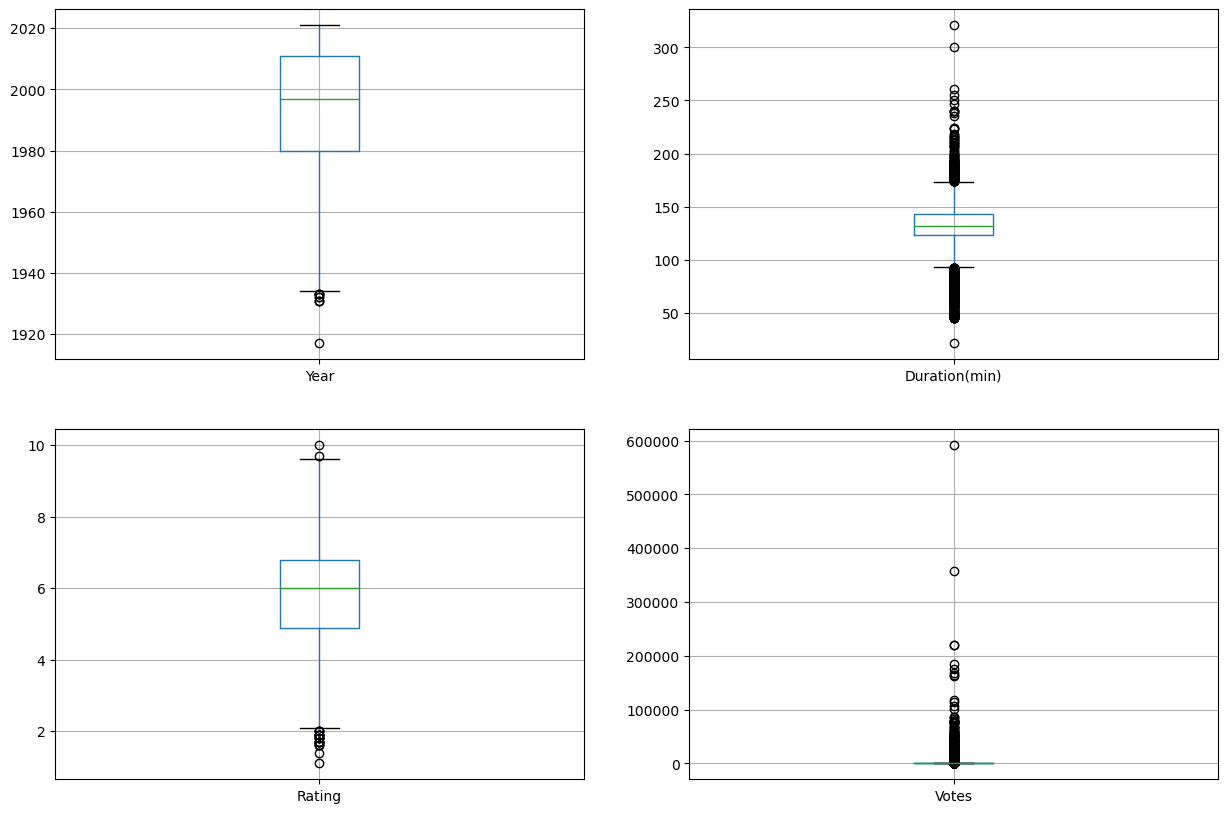

In [52]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

movies.boxplot("Year", ax=axes[0, 0])
movies.boxplot("Duration(min)", ax=axes[0, 1])
movies.boxplot("Rating", ax=axes[1, 0])
movies.boxplot("Votes", ax=axes[1, 1]);

`Does the rating tend to increase while the duration of the movies increases ?`

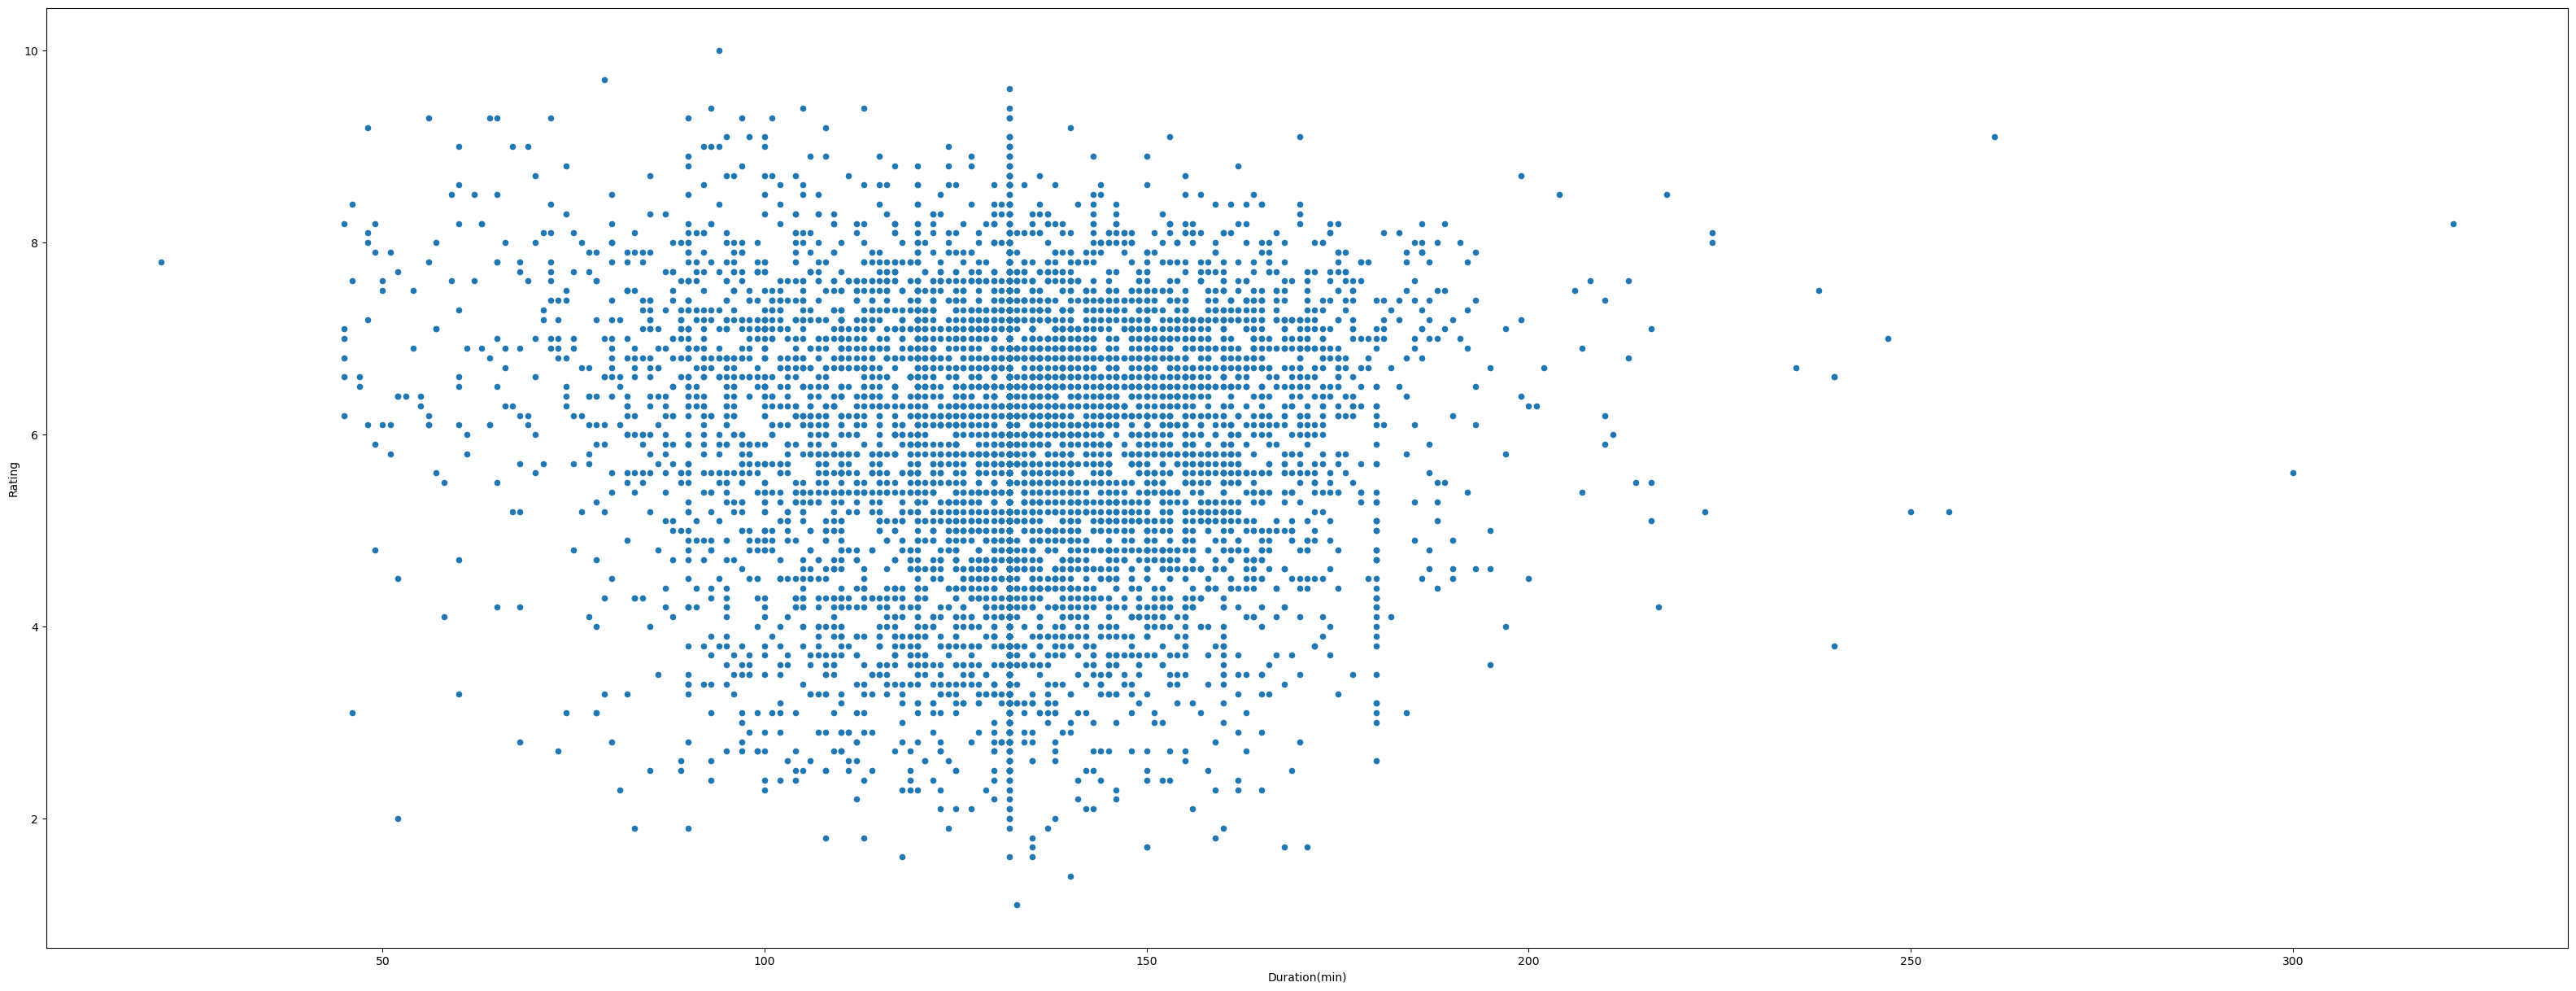

In [53]:
movies.plot.scatter("Duration(min)", "Rating", figsize=(40, 15));

`Conclusion :` As you can see there's no clear trend here between the duration and the rating.

`Is there any relation between the rating and number of votes ?`

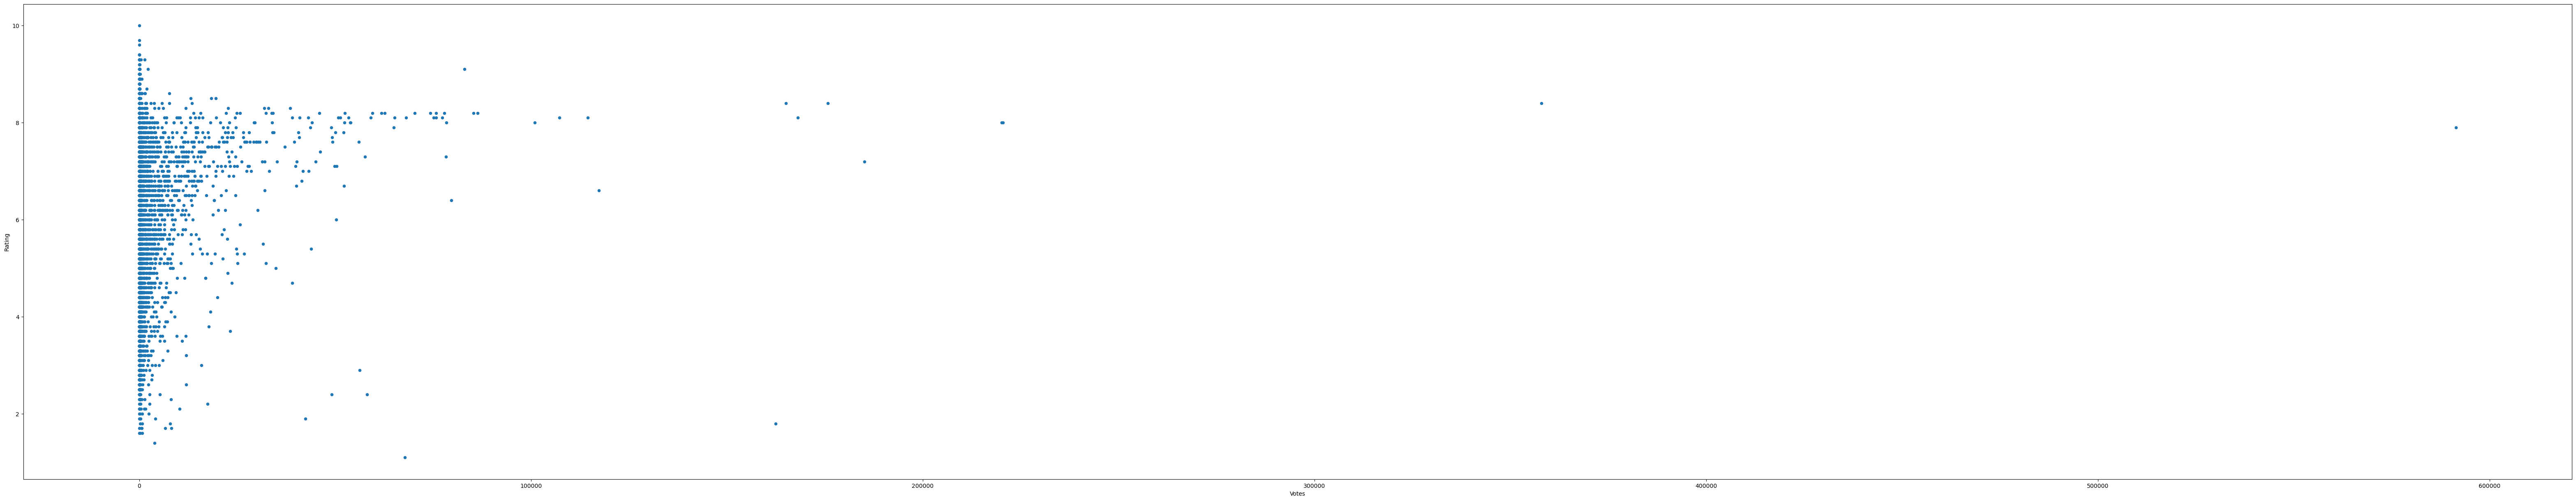

In [54]:
movies.plot.scatter("Votes", "Rating", figsize=(80, 15));

`Conclusion :` Again no clear trend between the rating and number of votes of a movie.

`Which directors have the top rating of movies ?`<br>
A director has generally multiple movies, to have one value we should consider the mean of ratings of his movies.

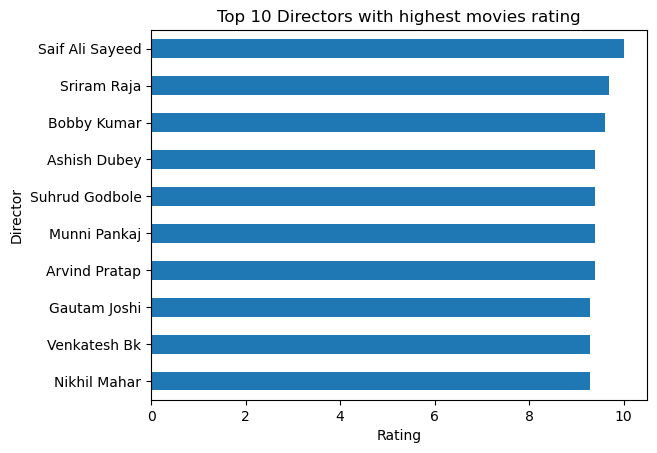

In [55]:
movies.groupby("Director")["Rating"].mean().sort_values(ascending=False).head(10).plot.barh()
plt.gca().invert_yaxis()
plt.xlabel("Rating")
plt.title("Top 10 Directors with highest movies rating");

`Which actors have the top ratings of movies ?`

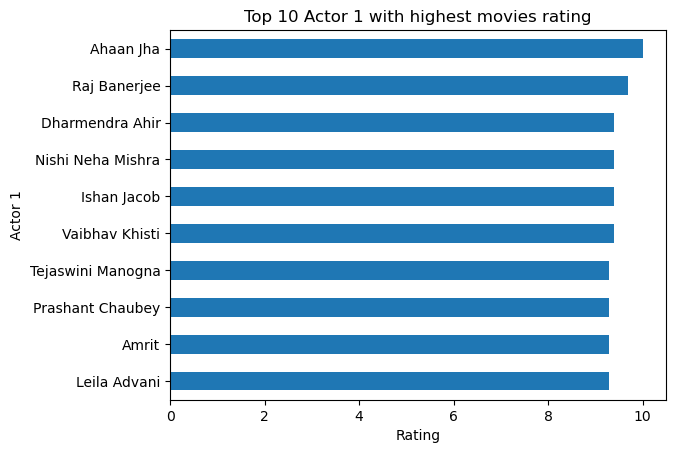

In [56]:
movies.groupby("Actor 1")["Rating"].mean().sort_values(ascending=False).head(10).plot.barh()
plt.gca().invert_yaxis()
plt.xlabel("Rating")
plt.title("Top 10 Actor 1 with highest movies rating");

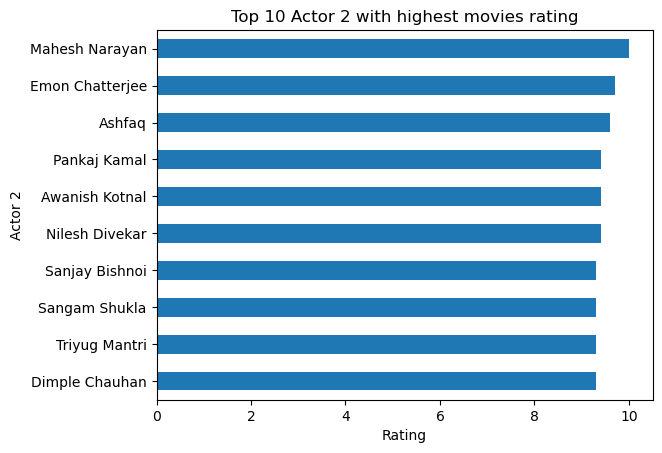

In [57]:
movies.groupby("Actor 2")["Rating"].mean().sort_values(ascending=False).head(10).plot.barh()
plt.gca().invert_yaxis()
plt.xlabel("Rating")
plt.title("Top 10 Actor 2 with highest movies rating");

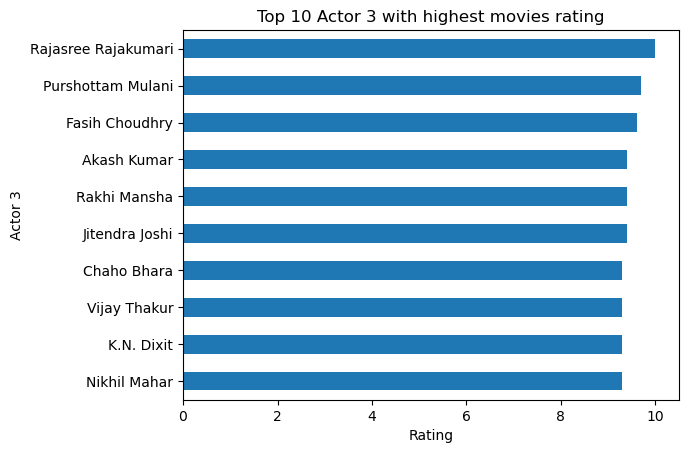

In [58]:
movies.groupby("Actor 3")["Rating"].mean().sort_values(ascending=False).head(10).plot.barh()
plt.gca().invert_yaxis()
plt.xlabel("Rating")
plt.title("Top 10 Actor 3 with highest movies rating");

`The trend of number of movies across years?`

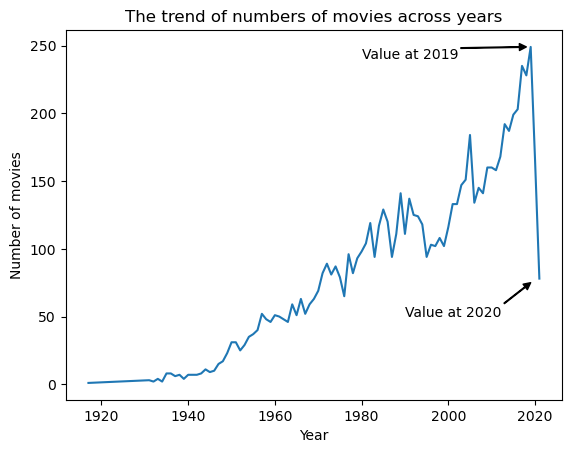

In [59]:
fig, ax = plt.subplots()
movies["Year"].value_counts().sort_index().plot();
ax.annotate('Value at 2019', xy=(2018, 249), xytext=(1980, 240),
            arrowprops=dict(facecolor='black', width=0.5,
                            headwidth=5, headlength=5));
ax.annotate('Value at 2020', xy=(2019, 75), xytext=(1990, 50),
            arrowprops=dict(facecolor='black', width=0.5,
                            headwidth=5, headlength=5))
plt.xlabel("Year")
plt.ylabel("Number of movies")
plt.title("The trend of numbers of movies across years");

`Conclusion :` There is a clear trend of increasing of number of movies produced across time. But there is a significant drop from 2019 to 2020. I can explain this as It is likely that the data is collected at the beginning or the middle of 2020.

`The trend of number of votes across years?`


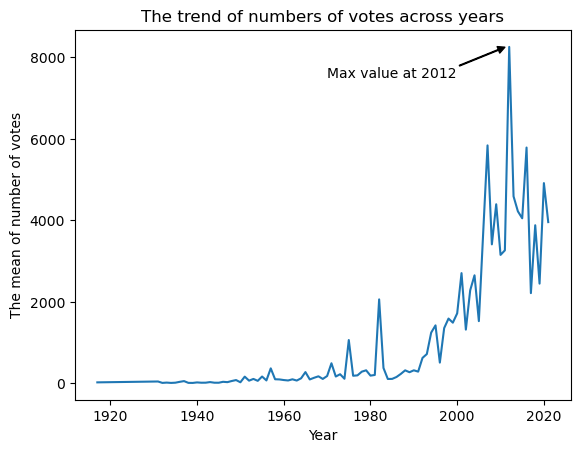

In [60]:
fig, ax = plt.subplots()

movies.groupby("Year")["Votes"].mean().plot()
ax.annotate('Max value at 2012', xy=(2011, 8250), xytext=(1970, 7500),
            arrowprops=dict(facecolor='black', width=0.5,
                            headwidth=5, headlength=5))
plt.xlabel("Year")
plt.ylabel("The mean of number of votes")
plt.title("The trend of numbers of votes across years");

`The trend of ratings across years?`

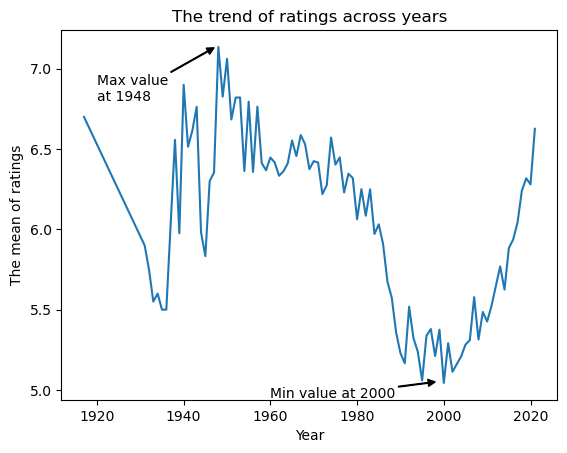

In [61]:
fig, ax = plt.subplots()

movies.groupby("Year")["Rating"].mean().plot()
ax.annotate('Min value at 2000', xy=(1998, 5.05), xytext=(1960, 4.95),
            arrowprops=dict(facecolor='black', width=0.5,
                            headwidth=5, headlength=5))
ax.annotate("Max value\nat 1948", xy=(1947, 7.13), xytext=(1920, 6.8),
            arrowprops=dict(facecolor='black', width=0.5,
                            headwidth=5, headlength=5))
plt.xlabel("Year")
plt.ylabel("The mean of ratings")
plt.title("The trend of ratings across years");

## Feature engineering

Now let's prepare feature that would be beneficial for the learning of our machine learning model that predict the rating.
First, we will make the compound Genres the like of "Crime, Drama" into dummy variables that took one elementary genre.
Then, we should utilize the director and actors names. It seems that using the raw names would be not very helpful. But It seems more beneficial to replace them by the mean ratings of movies by each actor, likewise with the director. The missing values would be replaced by the mean of ratings.

In [62]:
dummies = movies["Genre"].str.get_dummies(sep=", ")
movies = pd.concat([movies, dummies], axis=1)
movies.drop('Genre', axis=1, inplace=True)
movies

,Name,Year,Duration(min),Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Action,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,#Gadhvi (He thought he was Gandhi),2019,109,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,0,...,0,0,0,0,0,0,0,0,0,0
1,#Yaaram,2019,110,4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,0,...,0,0,0,0,1,0,0,0,0,0
2,...Aur Pyaar Ho Gaya,1997,147,4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,0,...,0,1,0,0,0,0,0,0,0,0
3,...Yahaan,2005,142,7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,0,...,0,0,0,0,1,0,0,0,1,0
4,?: A Question Mark,2012,82,5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7811,Zulm Ki Hukumat,1992,132,5.3,135.0,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda,1,...,0,0,0,0,0,0,0,0,0,0
7812,Zulm Ki Zanjeer,1989,125,5.8,44.0,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,1,...,0,0,0,0,0,0,0,0,0,0
7813,Zulm Ko Jala Doonga,1988,132,4.6,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,1,...,0,0,0,0,0,0,0,0,0,0
7814,Zulmi,1999,129,4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,1,...,0,0,0,0,0,0,0,0,0,0


In [63]:
movies.isna().sum()

Name               0
Year               0
Duration(min)      0
Rating             0
Votes              0
Director           5
Actor 1          110
Actor 2          176
Actor 3          259
Action             0
Adventure          0
Animation          0
Biography          0
Comedy             0
Crime              0
Documentary        0
Drama              0
Family             0
Fantasy            0
History            0
Horror             0
Music              0
Musical            0
Mystery            0
News               0
Romance            0
Sci-Fi             0
Sport              0
Thriller           0
War                0
Western            0
dtype: int64

In [64]:
m = movies["Rating"].median()

movies['Director_R'] = movies.groupby('Director')['Rating'].transform('mean')
movies['Actor1_R'] = movies.groupby('Actor 1')['Rating'].transform('mean')
movies['Actor2_R'] = movies.groupby('Actor 2')['Rating'].transform('mean')
movies['Actor3_R'] = movies.groupby('Actor 3')['Rating'].transform('mean')
movies.isna().sum()

Name               0
Year               0
Duration(min)      0
Rating             0
Votes              0
Director           5
Actor 1          110
Actor 2          176
Actor 3          259
Action             0
Adventure          0
Animation          0
Biography          0
Comedy             0
Crime              0
Documentary        0
Drama              0
Family             0
Fantasy            0
History            0
Horror             0
Music              0
Musical            0
Mystery            0
News               0
Romance            0
Sci-Fi             0
Sport              0
Thriller           0
War                0
Western            0
Director_R         5
Actor1_R         110
Actor2_R         176
Actor3_R         259
dtype: int64

In [65]:
movies["Director_R"].fillna(m, inplace=True)
movies["Actor1_R"].fillna(m, inplace=True)
movies["Actor2_R"].fillna(m, inplace=True)
movies["Actor3_R"].fillna(m, inplace=True)
movies.isna().sum()

Name               0
Year               0
Duration(min)      0
Rating             0
Votes              0
Director           5
Actor 1          110
Actor 2          176
Actor 3          259
Action             0
Adventure          0
Animation          0
Biography          0
Comedy             0
Crime              0
Documentary        0
Drama              0
Family             0
Fantasy            0
History            0
Horror             0
Music              0
Musical            0
Mystery            0
News               0
Romance            0
Sci-Fi             0
Sport              0
Thriller           0
War                0
Western            0
Director_R         0
Actor1_R           0
Actor2_R           0
Actor3_R           0
dtype: int64

## Model building

We should first prepare our predictors and Target.
Then split the data into training an test data

In [66]:
X = movies[['Year', 'Duration(min)', 'Votes', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western',
       'Director_R', 'Actor1_R', 'Actor2_R', 'Actor3_R']]
y = movies["Rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [68]:
lr_pred = lr.predict(X_test)

In [69]:
print("The mean squared error is :", mean_squared_error(y_test, lr_pred))
print("The mean absolute error is :", mean_absolute_error(y_test, lr_pred))
print("The R2 statistic is :", r2_score(y_test, lr_pred))

The mean squared error is : 0.49866263182265347
The mean absolute error is : 0.513145311587026
The R2 statistic is : 0.7352070514884139


The following is some samples of perdictions to make you get a sense of how the model is performing

In [70]:
pd.DataFrame({"Y (Test data)" : y_test.iloc[9:19], "Predicted Y" : lr_pred[9:19]})


,Y (Test data),Predicted Y
6821,6.0,6.094236
676,6.1,6.572967
4808,5.3,5.229766
251,6.6,6.472442
4901,6.0,6.361732
5335,5.5,6.560545
429,6.4,6.308920
858,6.9,6.565862
3379,2.9,5.092109
601,4.1,4.172124
